## Discretizing 1D Poisson's Equation with Finite Difference

$$ -\frac{\partial^2 u}{\partial x^2}
      = f(x)$$ 
Using the finite differences method to discretize the 1D Poisson's Equation.

In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.set_printoptions(threshold=np.inf)

A domain with a discrete set of x values of length N ($x_1, x_2,\cdots , x_{N}$) is chosen. The domain has boundaries assumed to be \{$x_1, x_{N}$\}. 
Each x value possesses a corresponding $f$ and $u$ denoted by $f_i$ and $u_i$, respectively.
<br>
A constant number, $\Delta x$, represents the spacing between these points. 

From the finite differences method
$$\frac{\partial^2 u}{\partial x^2}
 \approx \frac{u_{i+1}-2u_{i} +u_{i-1}}{\Delta x^2} .$$
 <br>

Therefore, for the 1D Poisson's equation
$$ -\frac{u_{i+1}-2u_{i} +u_{i-1}}{\Delta x^2}  =f_i.$$ 
 <br>
Note that for anything beyond the outer boundary points, we assume 0. 
<br>
As a result, the following linear system is produced:
$$Au = f.$$

The conditions for this case are as follows:
$$  \left\{
\begin{array}{ll}
      -u^{\prime\prime} = 1\\
      u(0) = u(N-1) = 0
\end{array} 
\right.  $$

In [5]:
N = 32
matrix = np.zeros((N,N), dtype=float, order='C') 

In [11]:
delta_x = 1
f = 1

In [7]:
for i in range(len(matrix)): 
    matrix[i,i] = 2/delta_x**2
    matrix[i,i-1] = -1/delta_x**2

for i in range(len(matrix)-1):
     matrix[i,i+1] = -1/delta_x**2
    
matrix[0,:] = 0
matrix[0,0] = 1

matrix[-1,:] = 0
matrix[-1,-1] = 1

b = np.ones(N)*f

b[0] = 0
b[-1] = 0

In [8]:
matrix

tensor([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  

In [9]:
b

tensor([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.], requires_grad=True)

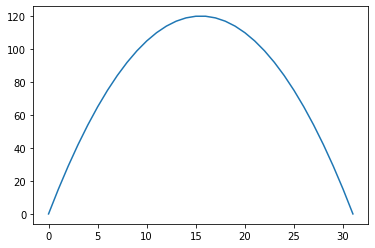

In [10]:
plt.plot(np.linalg.solve(matrix, b))